# Creating Mock Sales Data

Inspired by Keith Galli, who did a video about creating mock sales data (https://www.youtube.com/watch?v=VJBY2eVtf7o&t=3250s), I decided to create my own mock sales dataset based on his tutorial. The best way for me to begin the process of creating this dataset was to look at my own experiences. I've worked for 5 years in a shoestore and decided therefore to create data for a fictional online shoestore based in the Netherlands.

### Import modules

In [1]:
import pandas as pd
import numpy as np
import datetime
import random
import string
import calendar

### Creating the products the store is selling
I looked at the website of the shoestore I used to work for (www.manfield.com) and the types of shoes, the prices and the colors. This resulted in creating different dictionaries.

The dictionaries for the shoes, bags and accessories. Each key in the dictionary has a list as it's value. This list consist of the price of the product and different weights. The weights are used when choosing the product that's being sold using random.choices. For the shoes and accessories I choose weights based on season. As an example: Flip Flops and Sunglasses are more likely to be sold in summer and less likely in the winter.

In [2]:
womens_shoes = {
    # Product: [Price, Summer_weights, Winter_weights, Normal_weights]
    'Flip Flops': [29.99, 10, 1, 1],
    'Sandals': [49.99, 10, 1, 1],
    'Wedges': [69.95, 8, 2, 3],
    'Ballerinas': [79.95, 7, 3, 5],
    'Sneakers': [99.99, 5, 7, 8],
    'Pumps': [89.99, 6, 6, 5],
    'Ankle Boots': [119.99, 1, 10, 2],
    'Calf Boots': [149.99, 1, 10, 1],
}

In [3]:
mens_shoes = {
    # Product: [Price, Summer_weights, Winter_weights, Normal_weights]
    'Flip Flops': [29.99, 10, 1, 1],
    'Sandals': [49.99, 10, 1, 1],
    'Boat shoes': [59.99, 8, 1, 2],
    'Loafers': [69.99, 7, 1, 3],
    'Sneakers': [99.99, 6, 6, 6],
    'Boots': [119.99, 1, 10, 4],
    'Combat': [119.99, 1, 9, 5]
}

In [4]:
accessories = {
    # Product: [Price, summer_weights, winter_weights, normal_weights]
    'Socks': [7.99, 1, 4, 4],
    'Gloves': [14.99, 0, 10, 0],
    'Scarf': [24.99, 0, 10, 3],
    'Belt': [29.99, 3, 3, 3],
    'Wallet': [19.99, 2, 2, 2],
    'Summerhat': [24.99, 10, 0, 0],
    'Sunglasses': [39.99, 10, 0.5, 3],
    'Shoe care': [8.99, 5, 5, 5]
}

In the dictionaries for bags and colors I choose to use weights based on gender. Making it so that men are a little bit more conservative.

In [5]:
bags = {
    # Product: [Price, womens_weights, mens_weights]
    'Handbag': [99.99, 1, 0],
    'Shoulderbag': [79.99, 1, 1],
    'Shopper': [79.99, 1, 0],
    'Clutch': [39.99, 1, 0],
    'Backpack': [59.99, 1, 1],
    'Laptopbag': [99.99, 1, 1]
}

In [6]:
colors = {
    # Colors: [womens_weights, mens_weights]
    'black': [12, 10],
    'brown': [10, 10],
    'grey': [10, 9],
    'beige': [9, 9],
    'white': [3, 2],
    'multicolor': [5, 3],
    'blue': [1, 1],
    'green': [1, 1],
    'red': [1, 1],
    'pink': [1, 0],
    'silver': [1, 0],
    'gold': [1, 0]
}

The dictionary for shoesizes is also based on gender. When deciding what weights to use I used my knowledge of shoe sales. Womens shoes go from 35 to 42 and mens shoes from 39 to 47. The shoesizes most sold are 39 for women and 43 for men. The distribution of the weights I based on a normal distribution.

In [7]:
sizes = {
    # Sizes: [womens_weights, mens_weights]
    35: [1, 0],
    36: [2, 0],
    37: [3, 0],
    38: [4, 0],
    39: [5, 1],
    40: [4, 3],
    41: [3, 4],
    42: [2, 6],
    43: [0, 7],
    44: [0, 5],
    45: [0, 3],
    46: [0, 2],
    47: [0, 1]
}

### Deciding what the revenue of the year and months will be
I searched online on what the distribution of sales would look like for a shoe store and found the bar chart here below. 

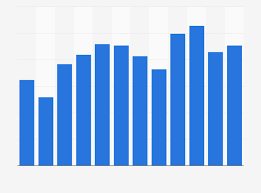

This bar chart came with no extra information. At first I decided that each bar would represent how many units there were sold each month. When my dataset was complete I found that this was not the way I wanted the data to be destributed. I decided to change it to how much revenue was made each month. I had already calculated how many units per month were sold. For the revenue per year I took the total sum of the units sold and multiplied it with an average price of €65.

In [8]:
units_p_month = [1300, 1050, 1550, 1700, 1850, 1800, 1650, 1500, 2000, 2100, 1700, 1800]
total_units = sum(units_p_month)
total_revenue = total_units * 65
print(total_revenue)

1300000


Then I calculated each months percentage of the total units and how much the revenue per month would be.

In [9]:
rev_p_month = []
for i in units_p_month:
    pct = 100/total_units * i
    rev_month = total_revenue / 100 * pct
    rev_p_month.append(rev_month)
print(rev_p_month)

[84500.0, 68250.0, 100750.0, 110500.0, 120250.0, 117000.0, 107250.0, 97500.0, 130000.0, 136500.0, 110500.0, 117000.0]


I found it not to be realistic to not have perfectly round numbers for revenue each month. Therefore I choose to use numpy.random.normal and take the revenue calculated before as a mean with a stand deviation of €100.

In [10]:
sales_month = {
    # Month with the corresponding revenue
    'jan': int(np.random.normal(loc=rev_p_month[0], scale=100)),
    'feb': int(np.random.normal(loc=rev_p_month[1], scale=100)),
    'mar': int(np.random.normal(loc=rev_p_month[2], scale=100)),
    'apr': int(np.random.normal(loc=rev_p_month[3], scale=100)),
    'may': int(np.random.normal(loc=rev_p_month[4], scale=100)),
    'jun': int(np.random.normal(loc=rev_p_month[5], scale=100)), 
    'jul': int(np.random.normal(loc=rev_p_month[6], scale=100)),
    'aug': int(np.random.normal(loc=rev_p_month[7], scale=100)),
    'sep': int(np.random.normal(loc=rev_p_month[8], scale=100)),
    'oct': int(np.random.normal(loc=rev_p_month[9], scale=100)),
    'nov': int(np.random.normal(loc=rev_p_month[10], scale=100)), 
    'dec': int(np.random.normal(loc=rev_p_month[11], scale=100))
}

In [11]:
# Checking the revenue per month after np.random.normal
for k, v in sales_month.items():
    print(k, v)

jan 84572
feb 68181
mar 100737
apr 110504
may 120265
jun 116929
jul 107406
aug 97531
sep 129887
oct 136616
nov 110375
dec 116810


### Adresses
To create the adresses for each order I needed to have streetnames, zipcodes and cities. On https://www.rtlnieuws.nl/nieuws/nederland/artikel/4643491/weinig-straatnamen-vernoemd-naar-vrouwen-straten-mannen-feminisme I found the most populair streetnames in the Netherlands  and I made a list of top 60. For the cities I used the biggest cities in the Netherlands according to https://nl.wikipedia.org/wiki/Lijst_van_grootste_gemeenten_in_Nederland. I decided not to use 2 because those were municipalities and are not used when writing your address. I assigned the first 2 numbers of number of residents as weights for each city. When choosing a city with random.choices the city with the highest weight has more change of being chosen.

In [12]:
street_names = ['Kerkstraat', 'Schoolstraat', 'Molenstraat', 'Dorpsstraat', 'Molenweg', 'Juliana-straat', 'Nieuwstraat', 'Wilhelminastraat', 'Parallelweg', 'Sportlaan', 'Industrieweg', 'Kastanjelaan', 'Beatrixstraat', 'Eikenlaan', 'Markt', 'Beukenlaan', 'Emmastraat', 'Stationsstraat', 'Stationsweg', 'Prins Bernhardstraat', 'Margrietstraat', 'Irenestraat', 'Kerkplein', 'Hoofdstraat', 'Kerkweg', 'Berkenlaan', 'Meidoornstraat', 'Raadhuisstraat', 'Leliestraat', 'Kloosterstraat', 'Oranjestraat', 'Rozenstraat', 'Spoorstraat', 'Nieuweweg', 'Bosweg', 'Hoogstraat', 'Kruisstraat', 'Tuinstraat', 'Dahliastraat', 'Torenstraat', 'Julianalaan', 'Stationsplein', 'Havenstraat', 'Lindenlaan', 'Prins Hendrikstraat', 'Rijksweg', 'Kerkpad', 'Parklaan', 'Middenweg', 'Groeneweg', 'Esdoornstraat', 'Kievitstraat', 'Raadhuisplein', 'Nijverheidsweg', 'Prins Beatrixstraat', 'Frans Halsstraat', 'Kerklaan', 'Meidoornlaan', 'Hogeweg', 'Leeuwerikstraat']
cities_zipcode = {
    # City: [zipcodes, weights]
    'Amsterdam': [list(range(1000, 1100)), 87],
    'Rotterdam': [list(range(3000, 3090)), 65],
    'Den Haag': [list(range(2490, 2598)), 54],
    'Utrecht': [list(range(3500, 3586)), 35],
    'Eindhoven': [list(range(5600, 5659)), 23],
    'Groningen': [list(range(9700, 9748)), 23],
    'Tilburg': [list(range(5000, 5050)), 21],
    'Almere': [list(range(1300, 1364)), 21],
    'Breda': [list(range(4800, 4840)), 18],
    'Nijmegen': [list(range(6500, 6547)), 17],
    'Apeldoorn': [list(range(7300, 7337)), 16],
    'Haarlem': [list(range(2000, 2038)), 16],
    'Arnhem': [list(range(6800, 6847)), 16],
    'Enschede': [list(range(7500, 7549)), 15],
    'Amersfoort': [list(range(3800, 3827)), 15],
    'Zaandam': [list(range(1500, 1510)), 15],
    '\'s-Hertogenbosch': [list(range(5200, 5238)), 15],
    'Zwolle': [list(range(8000, 8046)), 12],
    'Zoetermeer': [list(range(2700, 2730)), 12],
    'Leiden': [list(range(2300, 2335)), 12],
    'Leeuwarden': [list(range(8900, 8942)), 12],
    'Maastricht': [list(range(6200, 6230)), 12],
    'Dordrecht': [list(range(3300, 3330)), 11], 
    'Ede': [list(range(6710, 6719)), 11], 
    'Alphen aan den Rijn': [list(range(2400, 2410)), 11], 
    'Alkmaar': [list(range(1800, 1828)), 10], 
    'Emmen': [list(range(7800, 7829)), 10], 
    'Delft': [list(range(2600, 2630)), 10],
    'Venlo': [list(range(5900, 5929)), 10],
    'Deventer': [list(range(7400, 7429)), 10]
}

### Other things I needed to write down before creating the dataset

In [13]:
# List of columns to create the dataframe with
columns = ['Order ID',
           'Category',
           'Gender',
           'Product',
           'Size',
           'Color',
           'Quantity Ordered',
           'Price each',
           'Order Date',
           'Purchase Address']

In [14]:
# Randomly chosen order id
order_id = 37614
i=0

In [15]:
# Lists to make my code more readable

cities = [city for city in cities_zipcode]
city_weights = [cities_zipcode[city][1] for city in cities_zipcode]
zipcodes = [cities_zipcode[city][0] for city in cities_zipcode][0]

sizes_list = [size for size in sizes]
bags_list = [bag for bag in bags]
colors_list = [color for color in colors]
accessories_list = [accessory for accessory in accessories]

womens_shoe_list = [shoe for shoe in womens_shoes]
womens_size_weights = [sizes[size][0] for size in sizes]
womens_color_weights = [colors[color][0] for color in colors]
womens_bag_weights = [bags[bag][1] for bag in bags]

mens_shoe_list = [shoe for shoe in mens_shoes]
mens_size_weights = [sizes[size][0] for size in sizes]
mens_color_weights = [colors[color][1] for color in colors]
mens_bag_weights = [bags[bag][2] for bag in bags]

### Functions

In [16]:
def generate_random_address():
    """
    Generates a random fictional address in the Netherlands. 
    
    Returns
    -------
    str
        Random street, housenumber, zipcode, city.
    
    """
            
    street = random.choice(street_names)
    housenumber = random.randrange(1, 100)
    city = random.choices(cities, weights=city_weights)[0]
    
    zipcode = random.choice(zipcodes)
    letters_list = random.choices(string.ascii_uppercase, k=2)
    zipcode_letters = f'{letters_list[0]}{letters_list[1]}'
    
    return f'{street} {housenumber}, {zipcode}{zipcode_letters} {city}'

In [17]:
def generate_random_date(month):
    """ 
    Generates a date in de format dd/mm/year hour:minutes, with a peak around 12:00 and 20:00. 
    
    Parameters
    ----------
    month: str
        First 3 letters of the month
    
    Returns
    -------
    str
        dd/mm/year H:M
    
    """
    
    month_num = datetime.datetime.strptime(month, '%b').month
    day_range = calendar.monthrange(2019, month_num)[1]
    random_day = random.randint(1, day_range)
    
    if random.random() < 0.5:
        date = datetime.datetime(2019, month_num, random_day, 12,0)
    else:
        date = datetime.datetime(2019, month_num, random_day, 20,0)
    
    time_offset = np.random.normal(loc=0, scale=180)
    final_date = date + datetime.timedelta(minutes=time_offset)
    
    return final_date.strftime('%d/%m/%Y %H:%M')

In [18]:
def cal_season_weights(product_dict, month):
    """ 
    Finds the corresponding season weights to the month.
    
    The weights can be used in random.choices when choosing the products that are sold. By defining the weights some
    products will sell better in different months.
    
    Summer = May, June, Juli
    Winter = November, December, Januari
    
    Because shoes for each season are being sold before the season starts, begins the summer season in May and the winter
    season in November.
    
    Parameters
    ----------
    product_dict : list
        womens_shoes, mens_shoes or accessories
    month: str
        First 3 letters of the month
    
    Returns
    -------
    list
    
    """
    
    if month == 'may' or month == 'jun' or month == 'jul':
        season_weights = [product_dict[x][1] for x in product_dict]
    elif month == 'nov' or month == 'dec' or month == 'jan':
        season_weights = [product_dict[x][2] for x in product_dict]
    else:
        season_weights = [product_dict[x][3] for x in product_dict]
        
    return season_weights

In [19]:
def choose_color(gender_weights, matching_color=False):
    """
    Chooses the color of the product being sold.
    
    Parameters
    ----------
    gender_weights: list
        womens_color_weights or mens_color_weights
    matching_color: Bool
        default False
        
    Returns
    -------
    str
        color
        
    """
        
    if matching_color == True:
        match = df.at[i, 'Color']
        unique = random.choices(colors_list, weights=gender_weights)[0]
        color = random.choices([match, unique], weights=[10, 2])[0]
    else:
        color = random.choices(colors_list, weights=gender_weights)[0]
            
    return color

In [20]:
def quantity_ordered(price):
    """
    Chooses a random number for quantity based on a geometric distribution.
    
    The higher the price the less likely it is that there will be sold more of that product.
    
    Parameters
    ----------
    price: float
    
    Returns
    -------
    int
    
    """
        
    quantity = np.random.geometric(p=1.0-(1.0/price), size=1)[0]
    return quantity

In [21]:
def choose_shoe(order_id, gender, date, address, same_size=False):
    """
    Chooses the shoe that's being sold and creates a list of all the information of that order.
    
    Every item in the list corresponds to a column in the dataframe.
    This list can be used to create a row in the dataframe.
    
    Parameters
    ----------
    order_id: int
    gender: str
        'F' or 'M'
    date: str
    address: str
    same_size: bool
        default False
            
    Returns
    -------
    list    
    
    """
    
    global i
    category = 'Shoes'
    
    if same_size == False:
        if gender == 'F':
            season_weights = cal_season_weights(womens_shoes, month)
            shoe = random.choices(womens_shoe_list, weights=season_weights)[0]
            price = womens_shoes[shoe][0]
            size = random.choices(sizes_list, weights=womens_size_weights)[0]
            color = choose_color(womens_color_weights)
        else:
            season_weights = cal_season_weights(mens_shoes, month)
            shoe = random.choices(mens_shoe_list, weights=season_weights)[0]
            price = mens_shoes[shoe][0]
            size = random.choices(sizes_list, weights=mens_size_weights)[0]
            color = choose_color(mens_color_weights)
    else:
        if gender == 'F':
            season_weights = cal_season_weights(womens_shoes, month)
            shoe = random.choices(womens_shoe_list, weights=season_weights)[0]
            price = womens_shoes[shoe][0]
            size = df.at[i, 'Size']
            color = choose_color(womens_color_weights)
        else:
            season_weights = cal_season_weights(mens_shoes, month)
            shoe = random.choices(mens_shoe_list, weights=season_weights)[0]
            price = mens_shoes[shoe][0]
            size = df.at[i, 'Size']
            color = choose_color(mens_color_weights)
    
    quantity = quantity_ordered(price)
    
    i+=1
    
    global revenue
    revenue -= price
  
    return [order_id, category, gender, shoe, size, color, quantity, price, date, address]

In [22]:
def same_shoe_diff_size():
    """
    Creates a duplicate of the previous row, but changes the size.
    
    Returns
    -------
    list
    
    """
    
    global i
    
    previous_row = df.loc[i, :].tolist()
    size = previous_row[4]
    
    if size == 35.0 or size == 47.0:
        new_size = size+1
    else:
        new_size = random.choice([size-1, size+1])
        
    previous_row[4] = new_size
    
    i+=1
    
    return previous_row

In [23]:
def choose_bag(order_id, gender, date, address, matching_color=False):
    """
    Chooses the bag that's being sold and creates a list of all the information of that order.
    
    Every item in the list corresponds to a column in the dataframe.
    This list can be used to create a row in the dataframe.
    
    Parameters
    ----------
    order_id: int
    gender: str
        'F' or 'M'
    date: str
    address: str
    matching_color: bool
        default False
    
    Returns
    -------
    list
    """
    
    category = 'Bags'
    if gender == 'F':
        gender_color_weights = womens_color_weights
        gender_bag_weights = womens_bag_weights
    else:
        gender_color_weights = mens_color_weights
        gender_bag_weights = mens_bag_weights
        
    color = choose_color(gender_color_weights, matching_color)
        
    bag = random.choices(bags_list, weights=gender_bag_weights)[0]
    price = bags[bag][0]
    quantity = quantity_ordered(price)
    
    global i
    i+=1
    
    global revenue
    revenue -= price
    
    return [order_id, category, gender, bag, 'NA', color, quantity, price, date, address]

In [24]:
def choose_accessory(order_id, gender, date, address):
    """
    Chooses the accessory that's being sold and creates a list of all the information of that order.
    
    Every item in the list corresponds to a column in the dataframe.
    This list can be used to create a row in the dataframe.
    
    Parameters
    ----------
    order_id: int
    gender: str
        'F' or 'M'
    date: str
    address: str
    
    Returns
    -------
    list
        
    """
    
    category = 'Accessories'
    season_weights = cal_season_weights(accessories, month)
    accessory = random.choices(accessories_list, weights=season_weights)[0]
    
    if accessory == 'Shoe care':
        gender = 'NA'
        color = 'NA'
    elif gender == 'M' and accessory == 'Belt':
        color = choose_color(mens_color_weights, matching_color=True)
        if color == 'NA':
            color = choose_color(mens_color_weights)
    elif gender == 'M':
        color = choose_color(mens_color_weights)
    else:
        color = choose_color(womens_color_weights) 
    
    price = accessories[accessory][0]
    quantity = quantity_ordered(price)
    
    global i
    i+=1
    
    global revenue
    revenue -= price
    
    return [order_id, category, gender, accessory, 'NA', color, quantity, price, date, address]

### Creating the dataset

In [25]:
for month, sales in sales_month.items(): 
    df = pd.DataFrame(columns=columns) 
    revenue = sales 
    while revenue > 0: 
        address = generate_random_address() 
        date = generate_random_date(month) 
        
        percentage = random.random() 
        
        if percentage < 0.15: 
            df.loc[i] = choose_accessory(order_id, random.choice(['F', 'M']), date, address)            
        
        elif percentage > 0.15 and percentage < 0.3: 
            df.loc[i] = choose_bag(order_id, random.choice(['F', 'M']), date, address)
            if random.random() < 0.1: 
                gender = df.at[i, 'Gender']
                df.loc[i] = choose_accessory(order_id, gender, date, address)
                
        elif percentage > 0.3 and percentage < 0.55:
            df.loc[i] = choose_shoe(order_id, 'M', date, address)
            if random.random() < 0.2:
                df.loc[i] = choose_shoe(order_id, 'M', date, address, same_size=True)
            elif random.random() < 0.1: 
                df.loc[i] = same_shoe_diff_size()
            elif random.random() < 0.1: 
                df.loc[i] = choose_bag(order_id, 'M', date, address, matching_color=True)
            elif random.random() < 0.1:
                df.loc[i] = choose_accessory(order_id, 'M', date, address)
            
        else:
            df.loc[i] = choose_shoe(order_id, 'F', date, address)
            if random.random() < 0.2:
                df.loc[i] = choose_shoe(order_id, 'F', date, address, same_size=True)
            elif random.random() < 0.1:
                df.loc[i] = same_shoe_diff_size()
            elif random.random() < 0.2:
                df.loc[i] = choose_bag(order_id, 'F', date, address, matching_color=True)
            elif random.random() < 0.1:
                df.loc[i] = choose_accessory(order_id, 'F', date, address)
                    
        order_id += 1
            
    df.to_csv(f'sales_{month}_2019.csv', index=False)
    print(f'{month} Finished!')

jan Finished!
feb Finished!
mar Finished!
apr Finished!
may Finished!
jun Finished!
jul Finished!
aug Finished!
sep Finished!
oct Finished!
nov Finished!
dec Finished!
